In [18]:
pip install mat73

In [25]:
import mat73
import os
import numpy as np
import sys
import matplotlib.pyplot as plt

In [20]:
data_dict = mat73.loadmat('/content/drive/MyDrive/Collab/DMPA Project/Dataset/Dataset/1.mat')
data_dict

{'cjdata': {'PID': '100360', 'image': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'label': array(1.), 'tumorBorder': array([267.61524501, 231.37568058, 277.83666062, 248.10163339,
         289.91651543, 250.8892922 , 305.71324864, 253.676951  ,
         318.72232305, 249.9600726 , 321.50998185, 237.88021779,
         354.96188748, 234.16333938, 367.97096189, 227.65880218,
         380.9800363 , 210.93284936, 372.61705989, 195.13611615,
         363.32486388, 177.48094374, 350.31578947, 176.55172414,
         336.37749546, 183.98548094, 317.79310345, 196.06533575,
         305.71324864, 207.21597096, 295.49183303, 217.43738657,
         288.98729583, 222.08348457, 273.19056261, 223.94192377,
         268.54446461, 228.58802178]), 'tumorMask': array([[False, False, False, ..., False, False, False],
     

In [21]:
# maximum pixel value in an image
np.max(np.max(data_dict['cjdata']['image']))

3366

In [22]:
parent = '/content/drive/MyDrive/Collab/DMPA Project/Dataset/Dataset'

X,y=[],[]

for i in os.listdir(parent):
    path = os.path.join(parent, i) 
    data_dict = mat73.loadmat(path)
    
    # convert from integers to floats
    pixels = data_dict['cjdata']['image'].astype('float32')
    # calculate per-channel means and standard deviations
    means = pixels.mean(axis=(0,1), dtype='float64')
    stds = pixels.std(axis=(0,1), dtype='float64')
    
    # per-channel standardization of pixels
    pixels = (pixels - means) / stds
    
    X.append(np.array(pixels,dtype='float32'))

    if data_dict['cjdata']['label']==1.:
        y.append(0)
    elif data_dict['cjdata']['label']==2.:
        y.append(1)
    elif data_dict['cjdata']['label']==3.:
        y.append(2)

X = np.array(X,dtype='object')
y = np.array(y,dtype='object')

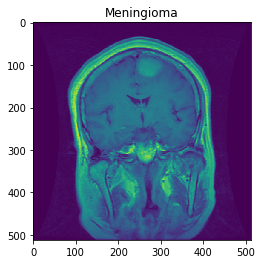

In [26]:
a = np.where(y==0)

plt.title('Meningioma')
plt.imshow(X[a[0][0]], interpolation='nearest')

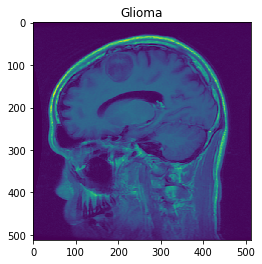

In [27]:
a = np.where(y==1)

plt.title('Glioma')
plt.imshow(X[a[0][2]], interpolation='nearest')

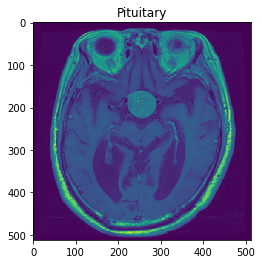

In [28]:
a = np.where(y==2)

plt.title('Pituitary')
plt.imshow(X[a[0][11]], interpolation='nearest')

In [23]:
np.save("/content/drive/MyDrive/Collab/DMPA Project/X.npy",X)
np.save("/content/drive/MyDrive/Collab/DMPA Project/y.npy",y)